Scott Berry - Assignment 6

We have learned the importance of representation. Let's try the example to understand better. Here is the code to produce the data similar to the example we used.

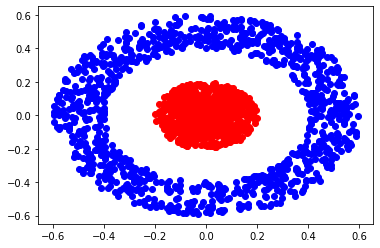

In [163]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

PI=np.pi
PI2=2*PI

def gencircle(rc,rr=0.1,offset=[0,0],num=100,label=0):
    #taken from https://qiita.com/xiangze750/items/1d024c8536d128c3ceae
    c=[]
    for i in range(num):
        r=rc+np.random.uniform(-rr,rr,1)
        th=np.random.uniform(0,PI2,1)
        c.append([r*np.sin(th)+offset[0],r*np.cos(th)+offset[1]])
    return np.c_[np.array(c).reshape(num,2),np.repeat(label,num)]

X=np.r_[gencircle(0.1,0.1,num=1000,label=0),gencircle(0.5,0.1,num=1000,label=1)][:,0:2]

plt.scatter(X[0:1000,0],X[0:1000,1],color="red")
plt.scatter(X[1000:2000,0],X[1000:2000,1],color="blue")

As you see, X is a matrix whose shape is 2000×2

the first 1000 rows are corresponding to red points, and the second 1000 row are corresponding to the blue data points.
### Task

- Try logistic regression to classify the data. It's okay if it does not work.
- Try feed forward neural network to classify the data. For this one, you need to find the architecture that works. Remember that you can adjust number of hidden layers and number of hidden units in each layer, activation function, etc.
- Report the (training) classification accuracy for both.

Use tensorflow for coding. This time, you do not have to test the algorithm on test dataset, because the purpose it to understand the importance of representation learning.

## Logistic Regression

Structure Data

In [164]:
from sklearn.preprocessing import StandardScaler
import torch
from sklearn.model_selection import train_test_split

# add 0 to represent red for first 1000 points and 1 to represent blue for last 1000 points
new_col = np.zeros((2000,1))
new_col[1000:] = 1
X_mod = np.append(X, new_col, 1)

# split
X_train, X_test, y_train, y_test = train_test_split(X_mod[:, :-1], X_mod[:, -1].astype(int), test_size=0.25, random_state=0)

# feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# convert to PyTorch
X_train, X_test, y_train, y_test = torch.Tensor(X_train), torch.Tensor(X_test), torch.Tensor(y_train), torch.Tensor(y_test)
print(X_train[0, :])
print(X_test[0, :])
print(y_train[0])
print(y_test[0])

tensor([-2.0010, -0.6045])
tensor([-0.2615, -0.6213])
tensor(1.)
tensor(0.)


Train Logistic Regression and Predict

In [165]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# predict test set
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [1. 0.]
 [0. 1.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [0. 1.]
 [1. 1.]
 [0. 1.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [1. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [0. 1.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 0.]
 

Confusion Matrix

In [166]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
acc = accuracy_score(y_test, y_pred)
print("Accuracy Score: " + str(acc))

[[ 89 165]
 [111 135]]
Accuracy Score: 0.448


Visualize training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


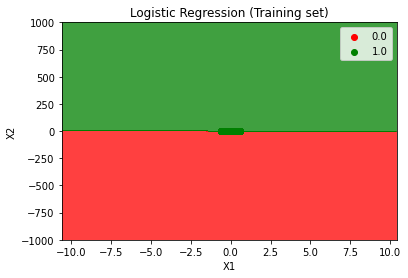

In [167]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

Feed forward Neural Network using TF

In [168]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X, new_col, batch_size = 1, epochs = 10)
y_pred = ann.predict(X)
y_pred = np.concatenate((X., y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]
print(y_pred)

Epoch 1/10
2000/2000 [==============================] - 1s 613us/step - loss: 0.7073 - accuracy: 0.4785
Epoch 2/10
2000/2000 [==============================] - 1s 595us/step - loss: 0.6934 - accuracy: 0.4950
Epoch 3/10
2000/2000 [==============================] - 1s 592us/step - loss: 0.6934 - accuracy: 0.4825
Epoch 4/10
2000/2000 [==============================] - 1s 591us/step - loss: 0.6934 - accuracy: 0.4755
Epoch 5/10
2000/2000 [==============================] - 1s 576us/step - loss: 0.6934 - accuracy: 0.4690
Epoch 6/10
2000/2000 [==============================] - 1s 601us/step - loss: 0.6933 - accuracy: 0.4995
Epoch 7/10
2000/2000 [==============================] - 1s 568us/step - loss: 0.6934 - accuracy: 0.4855
Epoch 8/10
2000/2000 [==============================] - 1s 576us/step - loss: 0.6933 - accuracy: 0.4960
Epoch 9/10
2000/2000 [==============================] - 1s 571us/step - loss: 0.6934 - accuracy: 0.5015
Epoch 10/10
2000/2000 [==============================] - 1s 574u